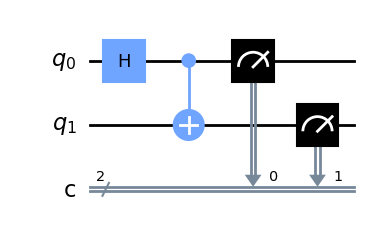

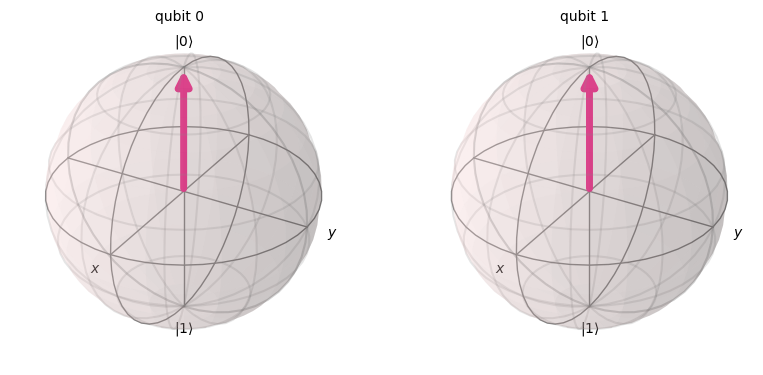


Measurement Results: {'00': 494, '11': 530}



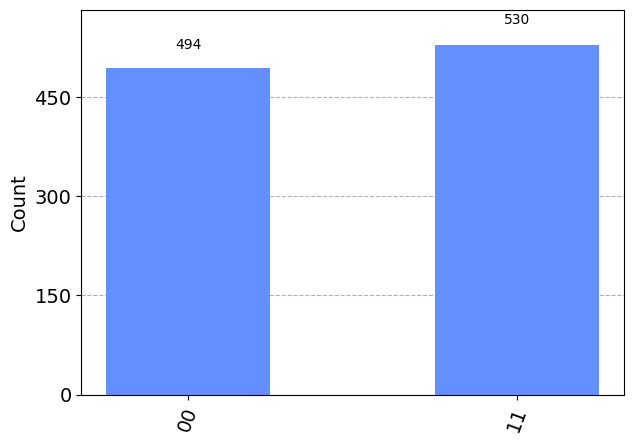

In [1]:
#-------------------------------------------------------------------------
# 2-qubit entanglement circuit
# Chapter 2 in the QUANTUM COMPUTING AND QUANTUM MACHINE LEARNING BOOK
#-------------------------------------------------------------------------
# Version 1.0
# (c) 2025 Jesse Van Griensven, Roydon Fraser, and Jose Rosas 
# Licence:  MIT - Citation required
#-------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#-------------------------------------------------------------------------
from qiskit import QuantumCircuit  as QC
from qiskit import QuantumRegister as QR

from qiskit import ClassicalRegister as CR

from qiskit import Aer
from qiskit import execute

from qiskit.visualization import plot_histogram
from qiskit.visualization import circuit_drawer
from qiskit.visualization import plot_state_qsphere
from qiskit.visualization import plot_bloch_multivector

#-------------------------------------------------------------------------
def get_state_vector(qc):
    """ Execute the circuit and get the state vector """
    backend = Aer.get_backend('statevector_simulator')
    result  = execute(qc, backend).result()
    state_vector = result.get_statevector()
    
    return state_vector

#-------------------------------------------------------------------------
def display_bloch(qc):
    """ Plots Bloch Sphere for the quantum circuit qc """
    # by Jesse Thé - Jan 2024
        
    # Execute the circuit and get the state vector
    state_vector = get_state_vector(qc)
    
    # Draw the circuit
    display(circuit_drawer(qc, output='mpl', style="iqp"))
    
    # Plot Bloch sphere for the entire system
    display(plot_bloch_multivector(state_vector) )
    
    return

#-------------------------------------------------------------------------

# Create a quantum circuit with 2 qubits and 2 classical bits
qc = QC(2, 2)

# Apply a Hadamard gate on the first qubit
qc.h(0)

# Apply a CNOT gate with qubit 0 as control and qubit 1 as target
qc.cx(0, 1)

# Measure the qubits
qc.measure([0, 1], [0, 1])

# Draw the Circuit and the Bloch Sphere
display_bloch(qc)

# Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, simulator).result()

# Now print the measurements for qubit "00" and qubit "11"
# Note that the simulator ran the noperations 1024 times.
# Therefore, the probability is the count / 1024
print()
print("Measurement Results:", result.get_counts())
print()

# Now plot the probabilities for qubit "00" and qubit "11"
plot_histogram(result.get_counts())
